
# Project: Investigate a Dataset (TMDB movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project the cleaned dataset containing information about around 10,000 movies collected from The Movie Database (TMDb) is being analysed. The questions being investigated are listed below:
1. How do the profits made from the movie vary with the popularity of the movie?
2. How the average runtime of movies changed over years?
3. Which genres are more popular over the years?
4. How popular are high budget movies as compared to low budget movies?

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
The general properties of the dataset such as the data type of each column, number of row with missing values and number of rows with duplicated observations, the unique genres present are investigated for better understanding of cleaning steps to be performed

In [2]:
# Load data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#checking for rows that are duplicated
sum(df.duplicated())

1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
genre_list=pd.unique(df['genres'].str.split('|', expand=True).values.ravel())
print(len(genre_list))
print(genre_list)

22
['Action' 'Adventure' 'Science Fiction' 'Thriller' None 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' nan 'Foreign']


##### Observations
1. The dataset has 10866 rows and 21 columns. Out of the 21 columns, the columns:mdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies have missing data or null values. Of these columns, the columns: imdb_id, cast, homepage, director, tagline, keywords, overview and production_companies are not necessary for the analysis and hence can be removed from the dataframe. 

2. The dataset has one duplicated row which has to be deleted

3. The median value of revenue and budget are 0. This indicates that majority of values in budget and revenue, which could be due to error. This has to be further studied

4. The genres column has multiple names seperated by |. This has to be converted to a more effective format. There are 20 unique genres in the dataset after excluding None and nan




### Data Cleaning 

In [9]:
#dropping columns not required in analysis
df.drop(columns={'imdb_id', 'cast', 'homepage', 'director', 'tagline', 
                 'keywords', 'production_companies','overview'},inplace=True)

In [10]:
#checking if the columns are deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


In [11]:
#removing the rows with null values
df.dropna(inplace=True)
#checking whether rows with null values are deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 13 columns):
id                10843 non-null int64
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [12]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [13]:
#rechecking for rows that are duplicated
sum(df.duplicated())

0

##### Dealing with zero values in budget and revenue

The median values of budget and revenue are zero, indicating that more than half of the values are zeros. Since in reality the budget and revenue cannot be zero, these values can be removed from the data. The data obtained by removing the zero values in budget and revenue will be stored in new dataframe to preserve remaining data for analysis not involving budget and revenue. Here an assumption is being made that the observation with zero budget and revenue have error only in these columns (budget, revenue, budget_adj, revenue_adj) and the data in other columns is valid


In [14]:
#creating function to plot histograms

def plot_histogram(column):
    plt.hist(column)
    plt.title(column.name+' distribution')

Plotting histograms of budget and revenue to check distribution before removing zero values

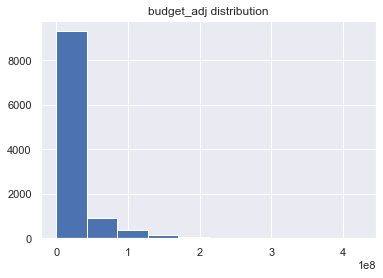

In [15]:
plot_histogram(df['budget_adj'])

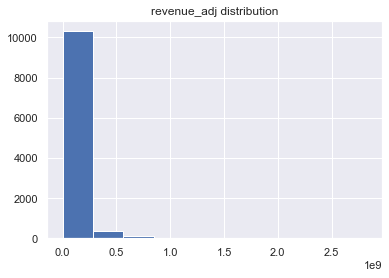

In [16]:
plot_histogram(df['revenue_adj'])

Removing the zero values and replotting the distributions

In [17]:
#creating new dataframe with non zero values of budget and revenue
df_nonzero=df.query('budget_adj!=0 & revenue_adj!=0')
df_nonzero.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
df_nonzero.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


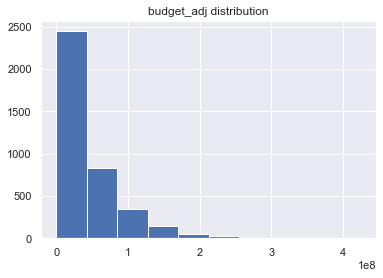

In [19]:
plot_histogram(df_nonzero['budget_adj'])

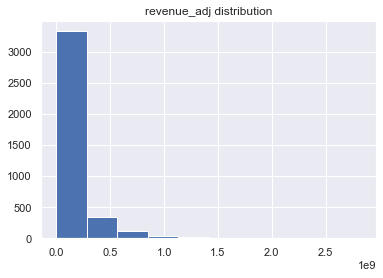

In [20]:
plot_histogram(df_nonzero['revenue_adj'])

From the histograms, it can be observed that the distributions of budget and revenue have become less skewed. The median values are no longer 0. However there is a significant loss in data. The number of observations have dropped from 10843 to 3855

##### Dealing with multiple genres
In the dataset, each movie has multiple genres. They are specified in genre column with each genre seperated by '|'. However, this format would be difficult to work with, to answer the research question 3. One way to deal with this is using the explode function of pandas to have multiple rows for the same movie with each genre it belongs to. This has been assigned to a new dataframe as modifying the orginal dataframe will affect the analysis of other research questions

In [21]:
#creating new dataframe for each genre
df_genres=df.assign(genres = df['genres'].str.split('|')).explode('genres')
df_genres.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


##### Creating profit column
In order to address the research question 1, the profits earned by each movie have to be calculated. This will be calculated as $ profit=revenue-budget $. The adjusted budget and revenue will be used here as it is necessary to account for inflation to make useful comparison 

In [22]:
#the dataframe with non zero values of budget and revenue will be used here
df_nonzero['profit_adj']=df_nonzero['revenue_adj']-df_nonzero['budget_adj']
df_nonzero.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:
### How do the profits made from the movie vary with the popularity of the movie?

For this analysis, intially the histograms of popularity and profits are plotted to observe how the values are distributed

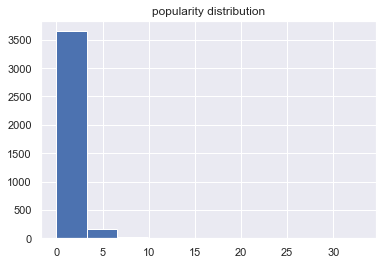

In [23]:
#plotting distribution of popularity
plot_histogram(df_nonzero['popularity'])

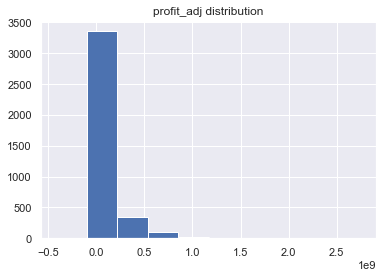

In [24]:
#plotting distribution of adjusted profit
plot_histogram(df_nonzero['profit_adj'])

Both the profits and popularity distributions are skewed to the right

Next, to study the relation between profits and popularity a scatter plot is drawn. This will give insight into the nature of their correlation

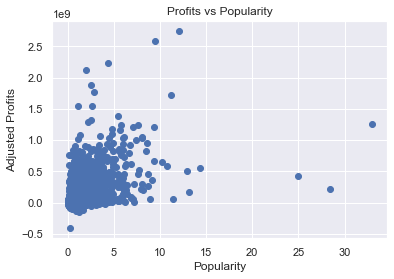

In [25]:
#using scatter plot to understand relation between profits and popularity
plt.scatter(df_nonzero['popularity'],df_nonzero['profit_adj'])
plt.title('Profits vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Adjusted Profits');

From the graph we can observe that as in general there is a positive correlation between adjusted profits and popularity. However, there are some points which have high popularity yet they don't earn high profits. There is a possibilty that these observations are outliers 

### Research Question 2 
### How has the average runtime of movies changed over years?


To study the trend of runtime, the average runtime for each year is estimated. Then a line plot is drawn for average runtime over years. Since plotting the average runtime will result in highly fluctuating graph, a moving average of the average runtimes with window=5 is also plotted for smoother plot

In [26]:
#finding average runtime by grouping with release_year
avg_runtime=df.groupby(['release_year'])['runtime'].mean()
avg_runtime.head()

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
Name: runtime, dtype: float64

In [27]:
#finding moving averages to smooth the trend
moving_avg_5=avg_runtime.rolling(5).mean()

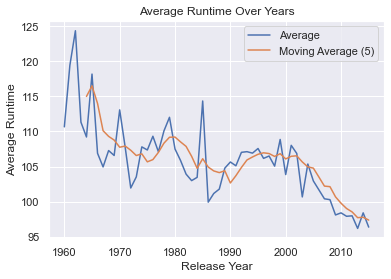

In [28]:
#plotting the trend in average runtime
plt.plot(avg_runtime,label='Average')
plt.plot(moving_avg_5, label='Moving Average (5)')
plt.title('Average Runtime Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')
plt.legend(loc='upper right');

In [29]:
print('The max average runtime was in ' + str(avg_runtime.idxmax()))
print('The min average runtime was in ' + str(avg_runtime.idxmin()))

The max average runtime was in 1962
The min average runtime was in 2013


From the analysis, it can be seen that the average runtime of movies has been decreasing over the years with the maximum average runtime observed in 1962 and minimum average runtime observed in 2013.

### Research Question 3
### Which genres are more popular over the years?

To find which genres are more popular over the years, firstly the mean popularity for each year and for each genre is calculated. Next, the genre with maximum mean popularity is selected for each year. Finally using this data, the number of years each genre has been most popular in calculated. A pie chart has been plotted to show the most popular genres over the years

In [30]:
#finding the average popularity of each genre in each year
#df_genres where each genre has been exploded is used here instead of df 
avg_popularity=df_genres.groupby(['release_year','genres'])['popularity'].mean().reset_index()

avg_popularity.head()

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305


In [31]:
#finding the max average popularity in each year
max_popularity=avg_popularity.groupby(['release_year'])['popularity'].max().reset_index()

max_popularity.head()

,release_year,popularity
0,1960,0.811910
1,1961,2.631987
2,1962,0.942513
3,1963,2.180410
4,1964,0.930959


In [32]:
#finding the most popular genre each year using max average popularity
popular_genre=pd.merge(avg_popularity,max_popularity,how='inner')

popular_genre.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


In [33]:
#number of unique genres popular over years
print(popular_genre['genres'].nunique())
#unique genres
print(popular_genre['genres'].unique())

13
['Thriller' 'Animation' 'Adventure' 'War' 'Music' 'Mystery' 'Crime'
 'Family' 'Fantasy' 'Action' 'Science Fiction' 'History' 'Western']


In [34]:
#finding how many years a genre has been most popular
counts=popular_genre['genres'].value_counts().reset_index()
counts.columns=['genres','count']
counts.head()

,genres,count
0,Adventure,14
1,Animation,10
2,Fantasy,9
3,Crime,5
4,Action,3


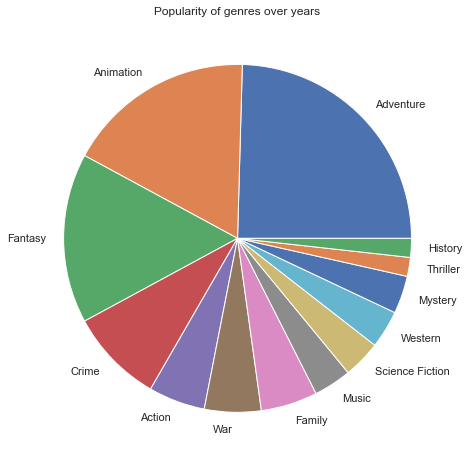

In [35]:
#plotting pie chart for popularity of genres
plt.figure(figsize=(8,8))
plt.pie(counts['count'], labels=counts['genres'])
plt.title('Popularity of genres over years');

It has been observed that out of the 20 unique genres, only 13 of them have been most popular atleast one year. These include Thriller, Animation, Adventure, War, Music, Mystery, Crime, Family, Fantasy, Science Fiction, Action, History and Western. Of these Animation and Adventure have been most popular over the years

### Research Question 4
### How popular are high budget movies as compared to low budget movies?

The difference in popularity of high budget and low budget movies is shown by plotting a bar chart between popularity and different budget levels. The different budget levels are obtained by categorizing the budget based on its distribution. The dataframe with non zero values for budget and revenue is used here

In [36]:
df_nonzero['budget'].describe()

count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [37]:
median_budget=df_nonzero['budget'].median()

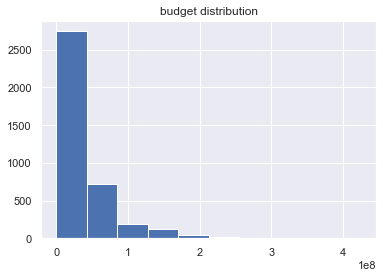

In [38]:
plot_histogram(df_nonzero['budget'])

The budget distribution is skewed to the right. Since there are fewer movies with high budget, only two levels of budget will be considered. Movies with budget higher than median budget will be considered high budget movies else low budget movies

In [39]:
#creating budget level column
df_nonzero['budget_level']= df_nonzero['budget'].apply(lambda x: 'High' if x>=median_budget else 'Low')
df_nonzero.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,budget_level
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,High
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,High
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,High
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,High
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,High


In [40]:
bud_pop=df_nonzero.groupby(['budget_level'])['popularity'].mean().reset_index()
bud_pop

,budget_level,popularity
0,High,1.569193
1,Low,0.809579


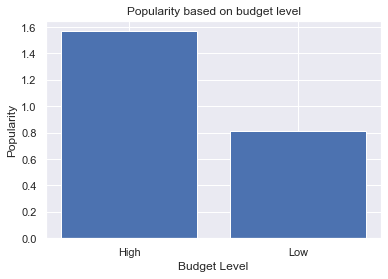

In [41]:
#plotting bar chart for popularity based on budget level
plt.bar([1,2],bud_pop['popularity'],tick_label=bud_pop['budget_level'])
plt.title('Popularity based on budget level')
plt.xlabel('Budget Level')
plt.ylabel('Popularity');

The popularity of high budget movies has been observed to be higher than low budget movies. The average popularity of high budget movies is 1.57 whereas that of low budget movies is 0.81

<a id='conclusions'></a>
## Conclusions

In conclusion, from the analysis of TMDB movie dataset the following results have been found:

1. Overall there is a positive correlation between adjusted profits and popularity with exception of some observations which could be outliers.

2. The average runtime of movies has shown a decreasing trend over the years with the maximum average runtime observed in 1962 and minimum average runtime observed in 2013

3. Adventure and Animation have been the most popular genres over time

4. The popularity of high budget movies is greater than low budget movies by 0.76 

This analysis, however has its limitations which are stated below:

1. The results obtained are limited to only this sample of data. Having different set of data can result in entirely new findings

2. The results are obtained after removing missing data as well as perceived errorenous data (data with budget and revenue equal to zero). This narrowed down the amount of data on which analysis was performed

3. No statistical tests have been performed to determine the significance of results obtained